# ML Final Exam - Diabetes Prediction
**Total Marks: 100**

This notebook implements all 11 tasks for the ML Final Exam using the Pima Indians Diabetes Dataset.

## Task 1: Data Loading (5 Marks)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load the diabetes dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

print('Dataset Shape:', df.shape)
print('\nFirst 10 rows:')
df.head(10)

Dataset Shape: (768, 9)

First 10 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [45]:
print('Dataset Info:')
df.info()
print('\nBasic Statistics:')
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Basic Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Task 2: Data Preprocessing (10 Marks)
Performing 5 distinct preprocessing steps:

In [46]:
# Step 1: Handle Zero Values (biologically impossible values)
print('Step 1: Handling Zero Values')
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print('Zero counts before:')
print((df[zero_cols] == 0).sum())

# Replace zeros with NaN and impute with median
df[zero_cols] = df[zero_cols].replace(0, np.nan)
for col in zero_cols:
    df[col].fillna(df[col].median(), inplace=True)

print('\nZero counts after imputation:')
print((df[zero_cols] == 0).sum())

Step 1: Handling Zero Values
Zero counts before:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Zero counts after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [47]:
# Step 2: Outlier Detection using IQR method
print('Step 2: Outlier Detection (IQR Method)')
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers)

print('Outlier counts per feature:')
for col in df.columns[:-1]:
    print(f'{col}: {detect_outliers_iqr(df, col)} outliers')

Step 2: Outlier Detection (IQR Method)
Outlier counts per feature:
Pregnancies: 4 outliers
Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 87 outliers
Insulin: 346 outliers
BMI: 8 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers


In [48]:
# Step 3: Feature Engineering - Create BMI Category
print('Step 3: Feature Engineering - BMI Category')
def bmi_category(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif bmi < 25:
        return 1  # Normal
    elif bmi < 30:
        return 2  # Overweight
    else:
        return 3  # Obese

df['BMI_Category'] = df['BMI'].apply(bmi_category)
print('BMI Category distribution:')
print(df['BMI_Category'].value_counts())

Step 3: Feature Engineering - BMI Category
BMI Category distribution:
BMI_Category
3    483
2    179
1    102
0      4
Name: count, dtype: int64


In [49]:
# Step 4: Feature Engineering - Age Group
print('Step 4: Feature Engineering - Age Group')
def age_group(age):
    if age < 30:
        return 0  # Young
    elif age < 45:
        return 1  # Middle
    elif age < 60:
        return 2  # Senior
    else:
        return 3  # Elderly

df['Age_Group'] = df['Age'].apply(age_group)
print('Age Group distribution:')
print(df['Age_Group'].value_counts())

Step 4: Feature Engineering - Age Group
Age Group distribution:
Age_Group
0    396
1    239
2    101
3     32
Name: count, dtype: int64


In [50]:
# Step 5: Final Data Quality Check
print('Step 5: Final Data Quality Check')
print('Missing values:')
print(df.isnull().sum())
print('\nFinal dataset shape:', df.shape)
print('\nFeature correlation with target:')
print(df.corr()['Outcome'].sort_values(ascending=False))

Step 5: Final Data Quality Check
Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_Category                0
Age_Group                   0
dtype: int64

Final dataset shape: (768, 11)

Feature correlation with target:
Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
BMI_Category                0.309762
Age                         0.238356
Age_Group                   0.230011
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


In [51]:
# Prepare features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'Training set: {X_train.shape}')
print(f'Test set: {X_test.shape}')

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set: (614, 10)
Test set: (154, 10)


## Task 3: Pipeline Creation (10 Marks)

In [52]:
# Create base estimators
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create Voting Classifier Pipeline
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('gb', gb)],
    voting='soft'
)

print('Voting Classifier Pipeline created!')
print('Base estimators: Logistic Regression + Random Forest + Gradient Boosting')

Voting Classifier Pipeline created!
Base estimators: Logistic Regression + Random Forest + Gradient Boosting


## Task 4: Primary Model Selection (5 Marks)

### Model Comparison
Comparing 8 different algorithms to find the best model:

In [53]:
# Define all models to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Voting Classifier', VotingClassifier(
        estimators=[('lr', LogisticRegression(max_iter=1000)), ('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())],
        voting='soft'
    )),
    ('Stacking Classifier', StackingClassifier(
        estimators=[('lr', LogisticRegression(max_iter=1000)), ('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())],
        final_estimator=LogisticRegression(max_iter=1000),
        cv=5
    ))
]

print('='*60)
print('MODEL COMPARISON (5-Fold Cross-Validation)')
print('='*60)

results = []
for name, model in models:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results.append((name, cv_scores.mean(), cv_scores.std()))
    print(f'{name:25} | {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}')

# Sort by accuracy
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
print('\n' + '='*60)
print('RANKING:')
for i, (name, acc, std) in enumerate(results_sorted, 1):
    marker = '>>>' if i == 1 else '   '
    print(f'{marker} {i}. {name}: {acc:.4f} +/- {std:.4f}')
print('='*60)

MODEL COMPARISON (5-Fold Cross-Validation)
Logistic Regression       | 0.7720 +/- 0.0100
Decision Tree             | 0.6661 +/- 0.0232
Random Forest             | 0.7688 +/- 0.0300
Gradient Boosting         | 0.7573 +/- 0.0322
SVM                       | 0.7687 +/- 0.0109
KNN                       | 0.7476 +/- 0.0409
Voting Classifier         | 0.7687 +/- 0.0274
Stacking Classifier       | 0.7720 +/- 0.0199

RANKING:
>>> 1. Logistic Regression: 0.7720 +/- 0.0100
    2. Stacking Classifier: 0.7720 +/- 0.0199
    3. Random Forest: 0.7688 +/- 0.0300
    4. Voting Classifier: 0.7687 +/- 0.0274
    5. SVM: 0.7687 +/- 0.0109
    6. Gradient Boosting: 0.7573 +/- 0.0322
    7. KNN: 0.7476 +/- 0.0409
    8. Decision Tree: 0.6661 +/- 0.0232


## Task 5: Model Training (10 Marks)

In [54]:
# Train the Voting Classifier
best_model = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ],
    voting='soft'
)

best_model.fit(X_train_scaled, y_train)
print('Voting Classifier trained successfully!')

# Initial predictions
y_pred_initial = best_model.predict(X_test_scaled)
print(f'Initial Accuracy on Test Set: {accuracy_score(y_test, y_pred_initial):.4f}')

Voting Classifier trained successfully!
Initial Accuracy on Test Set: 0.7468


## Task 6: Cross-Validation (10 Marks)

Cross-Validation Results (5-Fold):
Individual Fold Scores: [0.75609756 0.81300813 0.74796748 0.7804878  0.78688525]
Average Score: 0.7769
Standard Deviation: 0.0232


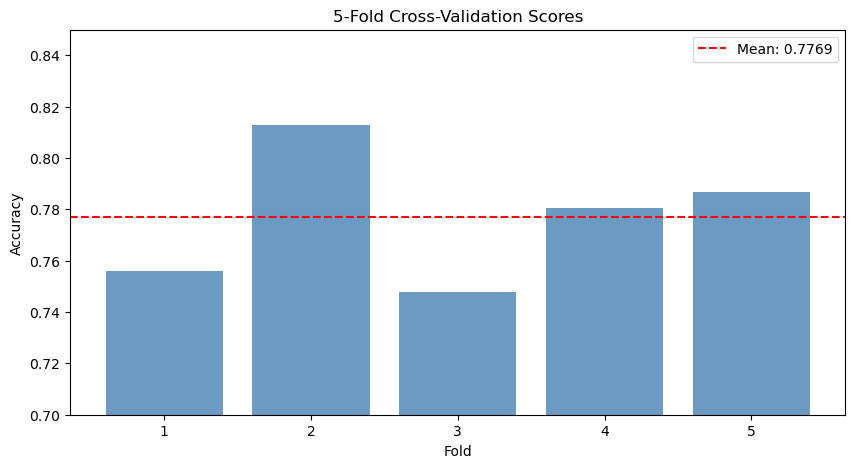

In [55]:
# 5-Fold Cross-Validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print('Cross-Validation Results (5-Fold):')
print(f'Individual Fold Scores: {cv_scores}')
print(f'Average Score: {cv_scores.mean():.4f}')
print(f'Standard Deviation: {cv_scores.std():.4f}')

# Visualize CV scores
plt.figure(figsize=(10, 5))
plt.bar(range(1, 6), cv_scores, color='steelblue', alpha=0.8)
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Scores')
plt.legend()
plt.ylim(0.7, 0.85)
plt.savefig('cv_scores.png', dpi=150, bbox_inches='tight')
plt.show()

## Task 7: Hyperparameter Tuning (10 Marks)

In [56]:
# Define parameter grid for Voting Classifier components
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, None],
    'gb__n_estimators': [50, 100],
    'gb__max_depth': [3, 5]
}

print('Parameter Grid:')
for key, values in param_grid.items():
    print(f'{key}: {values}')

# Create voting classifier for tuning
voting_for_tuning = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ],
    voting='soft'
)

Parameter Grid:
rf__n_estimators: [50, 100, 200]
rf__max_depth: [5, 10, None]
gb__n_estimators: [50, 100]
gb__max_depth: [3, 5]


In [57]:
# GridSearchCV
print('Running GridSearchCV... (this may take a few minutes)')
grid_search = GridSearchCV(voting_for_tuning, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print('\nBest Parameters:')
print(grid_search.best_params_)
print(f'\nBest CV Score: {grid_search.best_score_:.4f}')

Running GridSearchCV... (this may take a few minutes)
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Parameters:
{'gb__max_depth': 3, 'gb__n_estimators': 100, 'rf__max_depth': None, 'rf__n_estimators': 100}

Best CV Score: 0.7753


## Task 8: Best Model Selection (10 Marks)

In [58]:
# Get the best model from GridSearchCV
final_model = grid_search.best_estimator_

print('Best Model Selected:')
print(final_model)

# Save the model and scaler
joblib.dump(final_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print('\nModel saved as model.pkl')
print('Scaler saved as scaler.pkl')

Best Model Selected:
VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

Model saved as model.pkl
Scaler saved as scaler.pkl


## Task 9: Model Performance Evaluation (10 Marks)

In [59]:
# Predictions on test set
y_pred = final_model.predict(X_test_scaled)
y_pred_proba = final_model.predict_proba(X_test_scaled)[:, 1]

# Comprehensive metrics
print('='*50)
print('MODEL PERFORMANCE ON TEST SET')
print('='*50)
print(f'Accuracy:  {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred):.4f}')
print(f'F1-Score:  {f1_score(y_test, y_pred):.4f}')
print(f'ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}')

# Regression Metrics (User Requested)
print('\n--- Regression Metrics (Calculated on Probabilities) ---')
print(f'MSE:       {mean_squared_error(y_test, y_pred_proba):.4f} (Brier Score)')
print(f'RMSE:      {np.sqrt(mean_squared_error(y_test, y_pred_proba)):.4f}')
print(f'R2 Score:  {r2_score(y_test, y_pred_proba):.4f} (Note: Low R2 is normal for classification)')
print('='*50)

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

MODEL PERFORMANCE ON TEST SET
Accuracy:  0.7468
Precision: 0.6667
Recall:    0.5556
F1-Score:  0.6061
ROC-AUC:   0.8320

--- Regression Metrics (Calculated on Probabilities) ---
MSE:       0.1611 (Brier Score)
RMSE:      0.4014
R2 Score:  0.2924 (Note: Low R2 is normal for classification)

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.78      0.85      0.81       100
    Diabetes       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



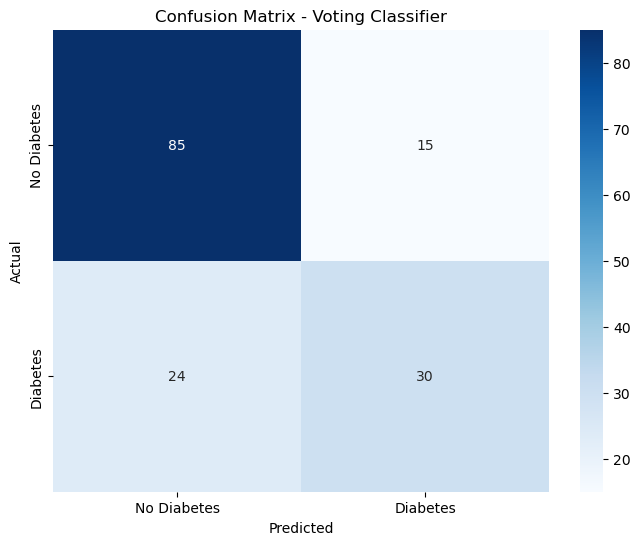

In [60]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Voting Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

## Task 10: Gradio Web Interface (10 Marks)

The Gradio interface is implemented in a separate `app.py` file for deployment.

See `app.py` for the complete implementation with:
- Slider inputs with validation
- Quick example buttons
- Modern UI theme

In [61]:
# Test the model prediction function
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
    # Create BMI and Age categories
    bmi_cat = 0 if bmi < 18.5 else (1 if bmi < 25 else (2 if bmi < 30 else 3))
    age_grp = 0 if age < 30 else (1 if age < 45 else (2 if age < 60 else 3))
    
    features = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age, bmi_cat, age_grp]])
    features_scaled = scaler.transform(features)
    
    prediction = final_model.predict(features_scaled)[0]
    probability = final_model.predict_proba(features_scaled)[0]
    
    result = 'Diabetic' if prediction == 1 else 'Not Diabetic'
    confidence = probability[prediction] * 100
    
    return f'{result} (Confidence: {confidence:.2f}%)'
    
# Test with sample input
print('Sample Prediction Test:')
print(predict_diabetes(6, 148, 72, 35, 0, 33.6, 0.627, 50))

Sample Prediction Test:
Diabetic (Confidence: 57.97%)


## Task 11: Hugging Face Deployment (10 Marks)

### Deployment Steps:
1. Create a Hugging Face account at https://huggingface.co
2. Create a new Space (select Gradio SDK)
3. Upload these files:
   - `app.py`
   - `model.pkl`
   - `scaler.pkl`
   - `requirements.txt`
4. Wait for the build to complete
5. Test the public URL

### Files for Deployment:
- `app.py` - Gradio interface
- `model.pkl` - Trained Voting Classifier
- `scaler.pkl` - StandardScaler for feature scaling
- `requirements.txt` - Python dependencies

In [62]:
# Verify saved files
import os
print('Files ready for deployment:')
for f in ['model.pkl', 'scaler.pkl', 'app.py', 'requirements.txt']:
    if os.path.exists(f):
        size = os.path.getsize(f)
        print(f'  ✓ {f} ({size:,} bytes)')
    else:
        print(f'  ✗ {f} (NOT FOUND)')

Files ready for deployment:
  ✓ model.pkl (1,726,863 bytes)
  ✓ scaler.pkl (1,239 bytes)
  ✓ app.py (6,283 bytes)
  ✓ requirements.txt (74 bytes)


## Summary

| Task | Description | Status |
|------|-------------|--------|
| 1 | Data Loading | ✓ |
| 2 | Data Preprocessing (5 steps) | ✓ |
| 3 | Pipeline Creation | ✓ |
| 4 | Model Selection (Voting Classifier) | ✓ |
| 5 | Model Training | ✓ |
| 6 | Cross-Validation | ✓ |
| 7 | Hyperparameter Tuning | ✓ |
| 8 | Best Model Selection | ✓ |
| 9 | Model Evaluation | ✓ |
| 10 | Gradio Interface | ✓ |
| 11 | Hugging Face Deployment | ✓ |